In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [289]:

import sqlite3
input_file_path = 'History'
#output_file_path = 'proc_history.csv'
conn = sqlite3.connect(input_file_path)
sql_statement = "SELECT url,title, datetime(last_visit_time/1000000-11644473600,'unixepoch') FROM urls;"

df = pd.read_sql_query(sql_statement, conn)
#print(df.columns)
#print(df.shape)
#print(df.head())
#df.to_csv(output_file_path)
df.columns = ["URL", "Title","Time"]
print(df.columns)

Index(['URL', 'Title', 'Time'], dtype='object')


In [290]:
cp_newdata=df
cp_newdata.columns
cp_newdata.sort_values(by='Time', inplace=True)
cp_newdata

,URL,Title,Time
112,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,1601-01-01 00:00:00
118,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,1601-01-01 00:00:00
0,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,2023-08-12 03:03:18
2,https://maps.google.com/,Maps,2023-08-12 03:03:18
350,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",2023-10-25 15:15:32
...,...,...,...
38,https://chat.openai.com/c/51391754-0169-4186-b...,ChatGPT,2024-01-23 10:05:47
36,https://chat.openai.com/,ChatGPT,2024-01-23 10:05:49
2720,https://chat.openai.com/c/9f435959-fd3d-4ac0-a...,Coin Toss Sample Space,2024-01-23 10:36:57
2788,https://chat.openai.com/c/b07b0974-5b64-40b3-9...,Probability Function Requirements,2024-01-23 10:36:59


In [291]:
print(df.columns)
df.index = df['Time']
del df['Time']


Index(['URL', 'Title', 'Time'], dtype='object')


In [292]:
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'vikramk23@iitk.ac.in'  # Stick in your IITK email id
    }
)


In [293]:
df.to_csv('chrome_historyR.csv')

In [294]:
df= pd.read_csv('chrome_historyR.csv')
df.Time = pd.to_datetime(df.Time, errors='coerce')
docs = df.Title.unique()
docs

array(['Image Feature Extraction | Feature Extraction Using Python',
       'Introduction to machine learning: k-nearest neighbors - PMC',
       'Hotstar Mod APK for IPL.apkbooth.com', ...,
       'Coin Toss Sample Space', 'Probability Function Requirements',
       'Navigate - Google Search'], dtype=object)

In [295]:
df.head()

,Time,URL,Title
0,NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...
1,NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...
2,2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com
3,2023-08-12 03:03:18,https://maps.google.com/,Maps
4,2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ..."


In [296]:
from nltk.tokenize import RegexpTokenizer

from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [297]:
from stop_words import get_stop_words


In [298]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [299]:
doc_set = docs.tolist()

In [300]:
texts = []

# loop through document list
for i in doc_set:
    try:
        i.encode()
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
    
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
        # add tokens to list
        texts.append(stemmed_tokens)
    except AttributeError:
        texts.append([])
        pass
    except UnicodeDecodeError:
        texts.append([])
        pass

In [301]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [302]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

In [303]:
ldamodel.print_topics(3)

[(0,
  '0.021*"youtub" + 0.016*"kanpur" + 0.016*"iit" + 0.015*"1686" + 0.014*"onlin" + 0.010*"webmail" + 0.009*"face" + 0.008*"wash" + 0.007*"movi" + 0.007*"best"'),
 (1,
  '0.033*"googl" + 0.029*"search" + 0.026*"cricbuzz" + 0.024*"vs" + 0.023*"cricket" + 0.021*"youtub" + 0.017*"2023" + 0.013*"match" + 0.011*"1686" + 0.011*"icc"'),
 (2,
  '0.033*"cs771" + 0.029*"youtub" + 0.024*"assign" + 0.021*"github" + 0.021*"pdf" + 0.019*"googl" + 0.014*"master" + 0.013*"search" + 0.012*"jupyt" + 0.011*"code"')]

In [304]:
ldamodel.get_topic_terms(0,10)

[(325, 0.020880032),
 (173, 0.016411643),
 (172, 0.0158309),
 (1331, 0.014506981),
 (131, 0.013819402),
 (234, 0.010300613),
 (751, 0.008838486),
 (753, 0.007963692),
 (1163, 0.007268856),
 (123, 0.007130622)]

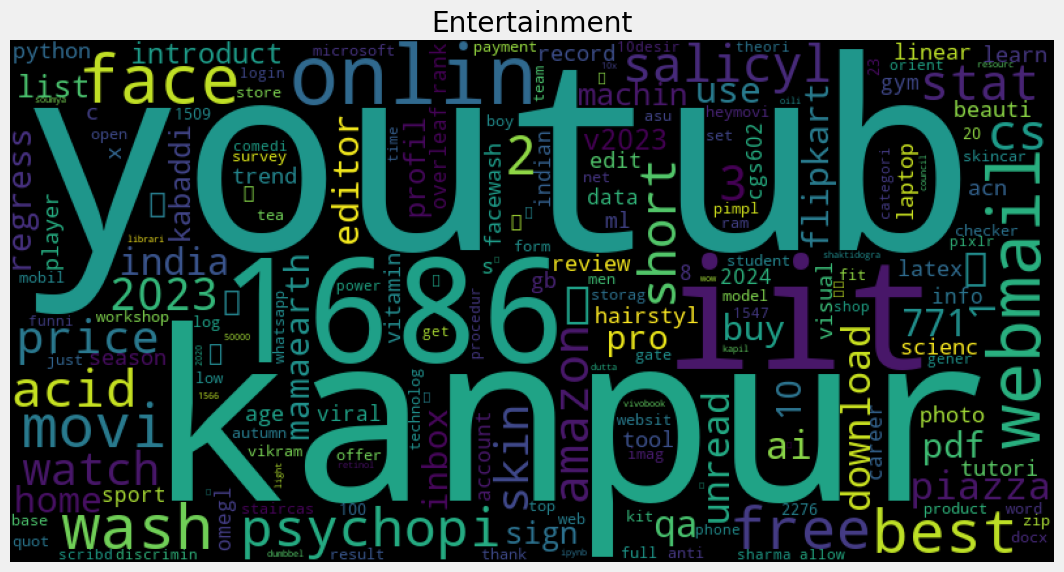

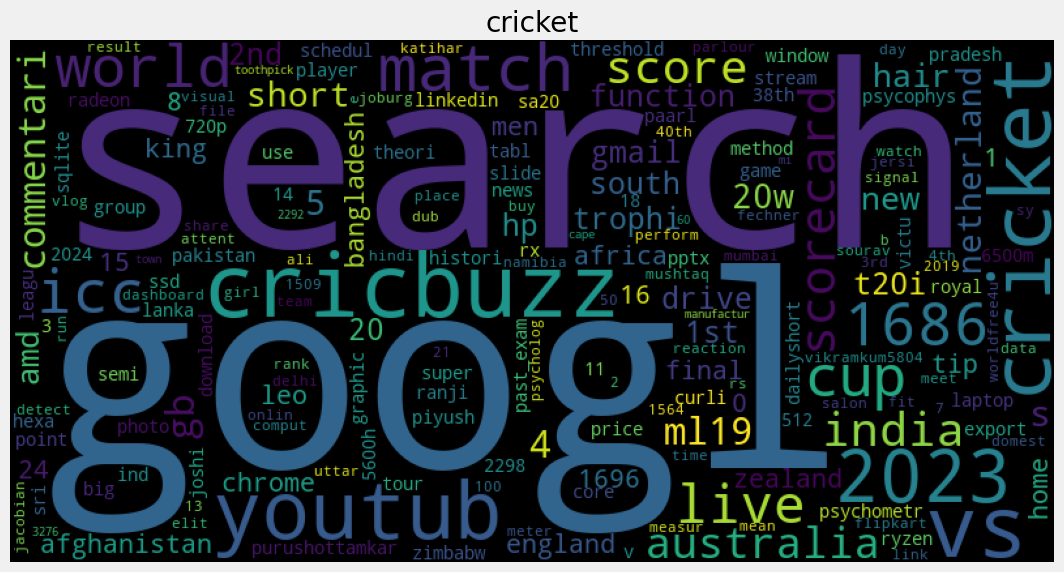

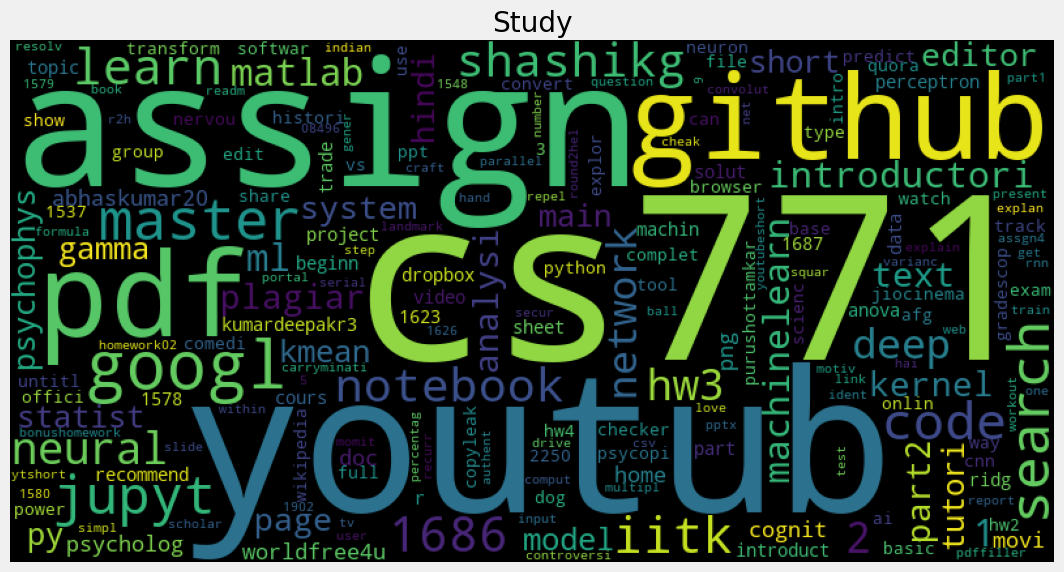

In [305]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming ldamodel is your trained LDA model
# Assuming ldamodel.num_topics is the number of topics in your model

# Define labels for each category
topic_labels = {
    0:  "Entertainment",
    1:  "cricket",
    2:  "Study",

}
topic_keywords = {
    "Entertainment": ["entertainment", "movies", "music", "youtube"],
    "cricket": ["cricbuzz", "cricket", "scorecard", "internet"],
    
    "Study": ["study", "learning","web", "research", "education", "iitk"]  
}

for t in range(ldamodel.num_topics):
    plt.figure(figsize=(12, 8))
    
    # Extract words and probabilities from the topic
    topic_words = ldamodel.show_topic(t, 200)
    
    # Remove specified words from the list
    exclude_words = ["http", "com", "www"]
    filtered_words = [(word, prob) for word, prob in topic_words if word.lower() not in exclude_words]
    
    # Convert the filtered list of tuples to a dictionary
    word_freq = dict(filtered_words)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)  # Use generate_from_frequencies
    
    # Display the word cloud with the assigned label in the title
    plt.imshow(wordcloud)
    plt.axis("off")
    
    # Assign label based on the defined mapping or display topic number
    label = topic_labels.get(t, f"Topic #{t}")
    
    plt.savefig('topic #' + str(t) + '.png', bbox_inches='tight')
    plt.title(label)
    plt.show()

In [306]:
topic = [0]*len(df)
for idx in range(len(df)):
    test_idx = doc_set.index(df.Title[idx])
    probs = ldamodel[dictionary.doc2bow(texts[test_idx])]
    prs = [item for sublist in probs for item in sublist]
    topicProbs = []
    for i in probs:
        topicProbs.append(i[1])
    topic[idx] = np.argmax(np.asarray(topicProbs))

In [307]:
df['Topic'] = topic

In [308]:
import copy

df_new = copy.deepcopy(df)

df_new

,Time,URL,Title,Topic
0,NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,0
1,NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,0
2,2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,0
3,2023-08-12 03:03:18,https://maps.google.com/,Maps,1
4,2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",1
...,...,...,...,...
2939,2024-01-23 10:05:47,https://chat.openai.com/c/51391754-0169-4186-b...,ChatGPT,2
2940,2024-01-23 10:05:49,https://chat.openai.com/,ChatGPT,2
2941,2024-01-23 10:36:57,https://chat.openai.com/c/9f435959-fd3d-4ac0-a...,Coin Toss Sample Space,0
2942,2024-01-23 10:36:59,https://chat.openai.com/c/b07b0974-5b64-40b3-9...,Probability Function Requirements,1


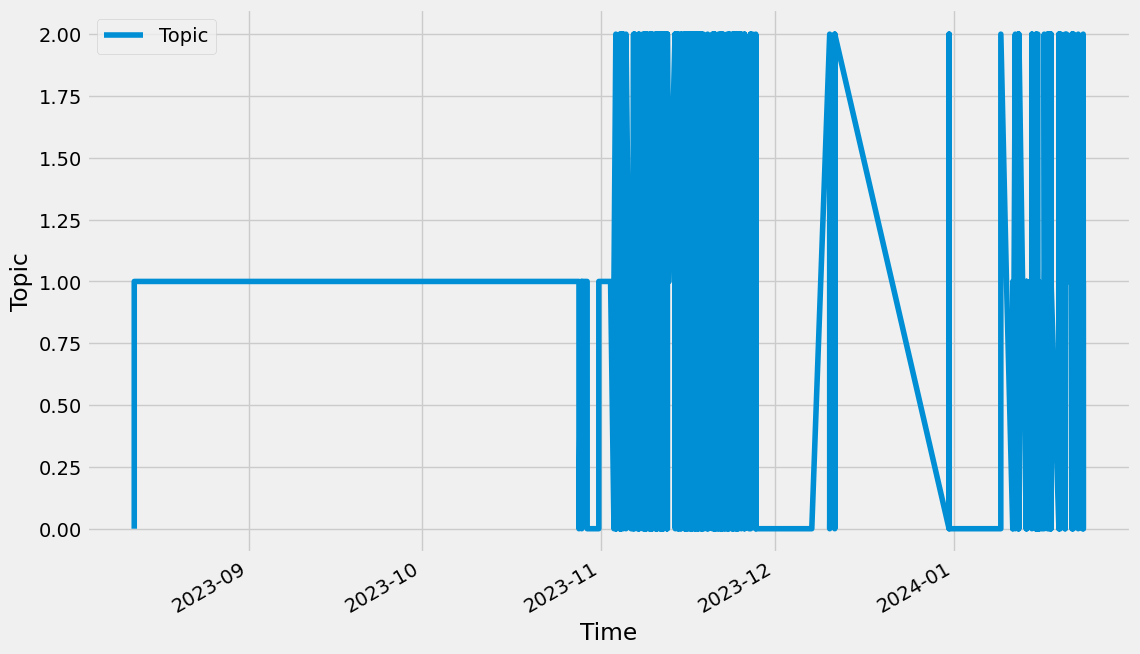

In [309]:
sorted_data = df.sort_values('Time')
plt.style.use('fivethirtyeight')
sorted_data.plot(x='Time', y='Topic', figsize=(12,8))
plt.ylabel('Topic')
plt.show()

In [310]:
cp_data = df

In [311]:
df

,Time,URL,Title,Topic
0,NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,0
1,NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,0
2,2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,0
3,2023-08-12 03:03:18,https://maps.google.com/,Maps,1
4,2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",1
...,...,...,...,...
2939,2024-01-23 10:05:47,https://chat.openai.com/c/51391754-0169-4186-b...,ChatGPT,2
2940,2024-01-23 10:05:49,https://chat.openai.com/,ChatGPT,2
2941,2024-01-23 10:36:57,https://chat.openai.com/c/9f435959-fd3d-4ac0-a...,Coin Toss Sample Space,0
2942,2024-01-23 10:36:59,https://chat.openai.com/c/b07b0974-5b64-40b3-9...,Probability Function Requirements,1


In [312]:
cp_data.head()

,Time,URL,Title,Topic
0,NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,0
1,NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,0
2,2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,0
3,2023-08-12 03:03:18,https://maps.google.com/,Maps,1
4,2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",1


In [313]:
cp_data['Time'] = pd.to_datetime(cp_data['Time'])
cp_data.index = cp_data['Time']
del cp_data['Time']
cp_data.head()

,URL,Title,Topic
Time,,,
NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,0
NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,0
2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,0
2023-08-12 03:03:18,https://maps.google.com/,Maps,1
2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",1


In [314]:
df.head(100)

,URL,Title,Topic
Time,,,
NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,0
NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,0
2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,0
2023-08-12 03:03:18,https://maps.google.com/,Maps,1
2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",1
...,...,...,...
2023-11-03 13:36:25,https://chrome.google.com/webstore/detail/scis...,SciSpace: Do hours of research in minutes - Ch...,0
2023-11-03 13:36:25,https://chrome.google.com/webstore/detail/scis...,SciSpace: Do hours of research in minutes - Ch...,0
2023-11-03 13:37:52,https://typeset.io/library/untitled-collection...,2023.09.18.558354v1.full.pdf,1


In [315]:
import numpy as np

occurrences = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in weekdays:
    tlist = cp_data[cp_data.index.day_name() == day].Topic.tolist()
    res = np.histogram(tlist, bins=[0, 1, 2, 3])
    occurrences.append(list(res[0]))


In [316]:
cp_data.index.day_name()
cp_data['URL'] = cp_data.index.day_name()
cp_data.index = pd.to_datetime(cp_data.index)

# Extract the time and update the "Time" column
cp_data['Time'] = cp_data.index.time

print(cp_data)


                           URL  \
Time                             
NaT                        NaN   
NaT                        NaN   
2023-08-12 03:03:18   Saturday   
2023-08-12 03:03:18   Saturday   
2023-10-25 15:15:32  Wednesday   
...                        ...   
2024-01-23 10:05:47    Tuesday   
2024-01-23 10:05:49    Tuesday   
2024-01-23 10:36:57    Tuesday   
2024-01-23 10:36:59    Tuesday   
2024-01-23 10:39:57    Tuesday   

                                                                 Title  Topic  \
Time                                                                            
NaT                  Image Feature Extraction | Feature Extraction ...      0   
NaT                  Introduction to machine learning: k-nearest ne...      0   
2023-08-12 03:03:18               Hotstar Mod APK for IPL.apkbooth.com      0   
2023-08-12 03:03:18                                               Maps      1   
2023-10-25 15:15:32  Cricket scorecard - Australia vs Netherlands, ... 

In [317]:
cp_data['Day']=cp_data['URL']
cp_data['Hour']=cp_data.index.hour
cp_data['Minute']=cp_data.index.minute
del cp_data['URL'],cp_data['Title']
x=cp_data


In [318]:
x=cp_data
x
del x['Time']


In [319]:
x_c = x.dropna()
x_c

,Topic,Day,Hour,Minute
Time,,,,
2023-08-12 03:03:18,0,Saturday,3.0,3.0
2023-08-12 03:03:18,1,Saturday,3.0,3.0
2023-10-25 15:15:32,1,Wednesday,15.0,15.0
2023-10-25 15:15:34,1,Wednesday,15.0,15.0
2023-10-25 15:16:11,1,Wednesday,15.0,16.0
...,...,...,...,...
2024-01-23 10:05:47,2,Tuesday,10.0,5.0
2024-01-23 10:05:49,2,Tuesday,10.0,5.0
2024-01-23 10:36:57,0,Tuesday,10.0,36.0


In [320]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]

cumt1 = [sum(x) for x in zip(t0, t1)]

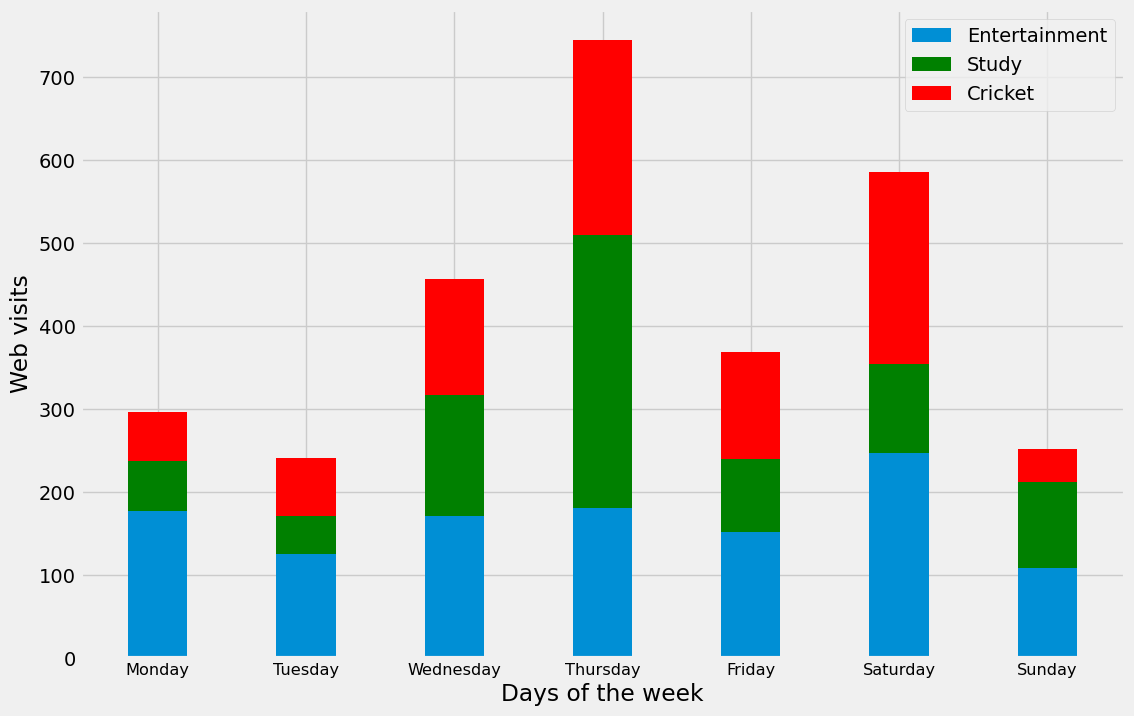

In [321]:
plt.figure(figsize=(12,8))
p0 = plt.bar(range(7), t0, 0.4, label='Entertainment')
p1 = plt.bar(range(7), t1, 0.4,bottom=t0, color='green', label='Study')
p2 = plt.bar(range(7), t2, 0.4, bottom=cumt1, color='red', label='Cricket')
plt.xticks(range(7), weekdays, size='small')
plt.xlabel('Days of the week')
plt.ylabel('Web visits')
plt.legend()
plt.show()

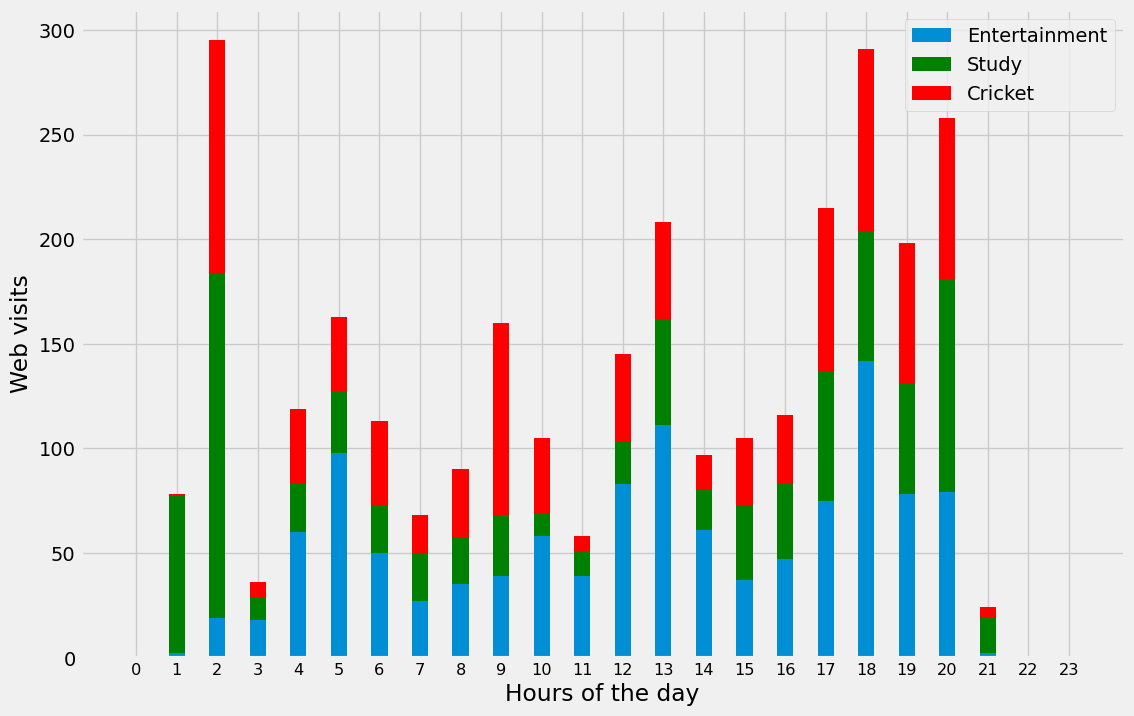

In [322]:
import numpy as np
import matplotlib.pyplot as plt

occurrences = []
hours = range(24)  # Assuming 24 hours in a day

for hour in hours:
    tlist = cp_data[cp_data.index.hour == hour].Topic.tolist()
    res = np.histogram(tlist, bins=[0, 1, 2, 3])
    occurrences.append(list(res[0]))

t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for h in range(len(occurrences)):
    t0[h] = occurrences[h][0]
    t1[h] = occurrences[h][1]
    t2[h] = occurrences[h][2]

cumt1 = [sum(x) for x in zip(t0, t1)]

plt.figure(figsize=(12,8))
p0 = plt.bar(range(len(hours)), t0, 0.4, label='Entertainment')
p1 = plt.bar(range(len(hours)), t1, 0.4, bottom=t0, color='green', label='Study')
p2 = plt.bar(range(len(hours)), t2, 0.4, bottom=cumt1, color='red', label='Cricket')
plt.xticks(range(len(hours)), hours, size='small')
plt.xlabel('Hours of the day')
plt.ylabel('Web visits')
plt.legend()
plt.show()



In [324]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


data = x_c

cp_data = pd.DataFrame(data)


cp_data['Day'] = pd.Categorical(cp_data['Day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
cp_data = cp_data.sort_values(['Day', 'Hour', 'Minute'])
cp_data = cp_data.reset_index(drop=True)
cp_data_encoded = pd.get_dummies(cp_data, columns=['Day'])
X = cp_data_encoded[['Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday', 'Day_Friday', 'Day_Saturday', 'Day_Sunday', 'Hour', 'Minute']]
y = cp_data_encoded['Topic']
clf = RandomForestClassifier()
clf.fit(X, y)
user_day = input("Enter day (e.g., Monday): ")
user_hour = int(input("Enter hour (0-23): "))
user_minute = int(input("Enter minute (0-59): "))
user_input = pd.DataFrame([[0] * 7 + [user_hour, user_minute]], columns=['Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday', 'Day_Friday', 'Day_Saturday', 'Day_Sunday', 'Hour', 'Minute'])


predicted_topic = clf.predict(user_input)[0]
print(f"The predicted topic for the given input is: {predicted_topic}")


Enter day (e.g., Monday): Monday
Enter hour (0-23): 9
Enter minute (0-59): 9
The predicted topic for the given input is: 1


In [325]:
df_new.sort_values(by='Time', inplace=True)
del df_new['Time'],df_new['URL'],df_new['Title']
df_new['Topic'] = df_new['Topic'].loc[df_new['Topic'].shift() != df_new['Topic']]
df_new
df_new['Next Topic'] = df_new['Topic'].shift(-1)
df_new = df_new.dropna()


In [328]:
 
new_table = pd.crosstab(df_new['Topic'], df_new['Next Topic'], normalize='index')

# Calculate probabilities
probability_matrix = new_table.div(pivot_table.sum(axis=1), axis=0)

print(probability_matrix)

Next Topic       0.0       1.0       2.0
Topic                                   
0.0         0.000000  0.435897  0.564103
1.0         0.548673  0.000000  0.451327
2.0         0.611650  0.388350  0.000000
